In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
classification = pd.read_csv("airlines_task.csv")
classification.loc[:, ["Airline", "AirportFrom", "AirportTo", "Flight"]].nunique(axis=0)
classification.dropna(inplace=True)
data_encoded = pd.get_dummies(classification, columns=["Airline"], dtype=int).reset_index(drop=True)
routes = pd.Series(data=(data_encoded.AirportTo + data_encoded.AirportFrom), name="Route")
routes
data_encoded: pd.DataFrame = pd.concat([data_encoded, routes], axis=1).drop(["AirportTo", "AirportFrom"], axis=1)
data_encoded.rename({0: "Route"}, axis=1, inplace=True)
data_encoded.Route.value_counts()
label_map = dict(zip(data_encoded.Route.unique().tolist(), np.arange(0, data_encoded.Route.unique().shape[0])))
label_map
data_encoded.Route = data_encoded.Route.map(lambda x: label_map.get(x))
classification = data_encoded

regression = pd.read_csv("diamonds.csv")
regression = pd.get_dummies(regression, columns=['cut','color','clarity'])
regression = regression.sample(frac=0.1)

In [ ]:
y_c = classification['Delay']
X_c = classification.drop(['Delay'], axis=1)

y_r = regression["price"]
X_r = regression.drop(["price", 'Unnamed: 0'], axis=1)

In [ ]:
X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(X_r, y_r, test_size=0.2)
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, test_size=0.2)

### VarianceThreshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
vt_r = VarianceThreshold(2)
X_vt_r = pd.DataFrame(vt_r.fit_transform(X_r), columns=vt_r.get_feature_names_out())
X_r.shape, X_vt_r.shape
X_vt_r

,table
0,54.0
1,56.0
2,61.0
3,61.0
4,54.0
...,...
5389,59.0
5390,61.0
5391,54.0
5392,56.0


In [ ]:
vt_c = VarianceThreshold(0.1)
X_vt_c = vt_c.fit_transform(X_c)
X_vt_c = pd.DataFrame(vt_c.fit_transform(X_c), columns=vt_c.get_feature_names_out())
X_c.shape, X_vt_c.shape
X_vt_c

,id,Flight,DayOfWeek,Time,Length,Airline_WN,Route
0,400740.0,3036.0,4.0,1195.0,131.0,0.0,0.0
1,194808.0,315.0,7.0,707.0,145.0,0.0,1.0
2,526903.0,6673.0,5.0,499.0,42.0,0.0,2.0
3,477937.0,3668.0,2.0,810.0,70.0,1.0,3.0
4,48180.0,623.0,5.0,985.0,143.0,0.0,4.0
...,...,...,...,...,...,...,...
397302,488611.0,1533.0,3.0,415.0,150.0,0.0,334.0
397303,188847.0,486.0,7.0,365.0,107.0,0.0,1843.0
397304,437638.0,3111.0,7.0,640.0,84.0,0.0,3081.0
397305,98020.0,623.0,1.0,1000.0,220.0,0.0,530.0


### SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
skb_r = SelectKBest(k=3)
X_skb_r = pd.DataFrame(skb_r.fit_transform(X_r, y_r), columns=skb_r.get_feature_names_out())
X_r.shape, X_skb_r.shape

X_skb_r

,carat,x,y
0,0.54,5.28,5.30
1,0.54,5.22,5.21
2,0.32,4.39,4.41
3,1.51,7.16,7.19
4,0.33,4.43,4.45
...,...,...,...
5389,0.25,4.02,4.05
5390,0.53,5.15,5.20
5391,1.01,6.38,6.44
5392,0.36,4.55,4.60


In [ ]:
skb_c = SelectKBest(k=3)
X_skb_c = pd.DataFrame(skb_c.fit_transform(X_c, y_c), columns=skb_c.get_feature_names_out())
X_c.shape, X_skb_c.shape

X_skb_c

,id,Time,Airline_WN
0,400740.0,1195.0,0.0
1,194808.0,707.0,0.0
2,526903.0,499.0,0.0
3,477937.0,810.0,1.0
4,48180.0,985.0,0.0
...,...,...,...
397302,488611.0,415.0,0.0
397303,188847.0,365.0,0.0
397304,437638.0,640.0,0.0
397305,98020.0,1000.0,0.0


### RFE

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_r = DecisionTreeRegressor().fit(X_r, y_r)
tree_c = DecisionTreeClassifier().fit(X_c, y_c)

In [ ]:
rfe_r = RFE(estimator=tree_r, n_features_to_select=3, step=1).fit(X_r, y_r)
X_rfe_r = pd.DataFrame(rfe_r.transform(X_r), columns=rfe_r.get_feature_names_out())
X_r.shape, X_rfe_r.shape

X_rfe_r

,carat,y,z
0,0.54,5.30,3.23
1,0.54,5.21,3.23
2,0.32,4.41,2.68
3,1.51,7.19,4.60
4,0.33,4.45,2.77
...,...,...,...
5389,0.25,4.05,2.52
5390,0.53,5.20,3.17
5391,1.01,6.44,4.02
5392,0.36,4.60,2.81


In [ ]:
rfe_c = RFE(estimator=tree_c, n_features_to_select=3, step=1).fit(X_c, y_c)
X_rfe_c = pd.DataFrame(rfe_c.transform(X_c), columns=rfe_c.get_feature_names_out())
X_c.shape, X_rfe_c.shape

X_rfe_c

,id,Flight,Route
0,400740.0,3036.0,0.0
1,194808.0,315.0,1.0
2,526903.0,6673.0,2.0
3,477937.0,3668.0,3.0
4,48180.0,623.0,4.0
...,...,...,...
397302,488611.0,1533.0,334.0
397303,188847.0,486.0,1843.0
397304,437638.0,3111.0,3081.0
397305,98020.0,623.0,530.0


### Principal Component Analysis - PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_r = PCA(n_components=3)
X_pca_r = pd.DataFrame(pca_r.fit_transform(X_r, y_r), columns=pca_r.get_feature_names_out())
X_r.shape, X_pca_r.shape

X_pca_r

,pca0,pca1,pca2
0,-3.308759,0.232121,-1.600624
1,-1.740964,-0.287145,-0.205428
2,2.655742,-3.276457,0.409815
3,3.546147,1.577434,3.037843
4,-4.032471,-0.600956,-0.110139
...,...,...,...
5389,0.356510,-2.862107,1.419591
5390,3.008432,-2.054015,0.675751
5391,-3.028948,2.286181,-0.150743
5392,-1.987087,-1.319403,-0.602583


In [ ]:
pca_c= PCA(n_components=3)
X_pca_c = pca_c.fit_transform(X_c, y_c)
X_pca_c = pd.DataFrame(pca_c.fit_transform(X_c, y_c), columns=pca_c.get_feature_names_out())
X_c.shape, X_pca_c.shape

X_pca_r

,pca0,pca1,pca2
0,-3.308759,0.232121,-1.600624
1,-1.740964,-0.287145,-0.205428
2,2.655742,-3.276457,0.409815
3,3.546147,1.577434,3.037843
4,-4.032471,-0.600956,-0.110139
...,...,...,...
5389,0.356510,-2.862107,1.419591
5390,3.008432,-2.054015,0.675751
5391,-3.028948,2.286181,-0.150743
5392,-1.987087,-1.319403,-0.602583


### TSNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne_r = TSNE(n_components=3)
X_tsne_r = tsne_r.fit_transform(X_r)
X_r.shape, X_tsne_r.shape

((5394, 26), (5394, 3))

In [ ]:
tsne_c = TSNE(n_components=3)
X_tsne_c = tsne_c.fit_transform(X_c)
X_c.shape, X_tsne_c.shape

### Isomap

In [ ]:
from sklearn.manifold import Isomap

In [ ]:
isomap_r = Isomap(n_components=3)
X_isomap_r = pd.DataFrame(isomap_r.fit_transform(X_r), columns=isomap_r.get_feature_names_out())
X_r.shape, X_isomap_r.shape

X_isomap_r

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


,isomap0,isomap1,isomap2
0,-5.951579,-1.162946,0.719758
1,-4.303168,2.394701,2.146354
2,5.185719,-6.139683,-1.607396
3,6.195248,2.334582,-5.379380
4,-7.707632,-0.943636,-0.220043
...,...,...,...
5389,1.983292,-6.459199,-0.880642
5390,5.603745,-3.922298,-2.179507
5391,-4.015266,3.493140,0.800366
5392,-3.790068,-2.178026,1.263524


In [ ]:
isomap_c = Isomap(n_components=3, max_iter=50)
X_isomap_c = pd.DataFrame(isomap_c.fit_transform(X_c[:5000]), columns=isomap_c.get_feature_names_out())
X_c.shape, X_isomap_c.shape

X_isomap_c

,isomap0,isomap1,isomap2
0,-134014.706082,-326.749257,2498.841108
1,113789.568784,5048.780638,-4808.434609
2,-283064.033036,-7810.303059,-6175.870986
3,-229169.156975,-4889.534366,-546.497157
4,295846.727277,-7969.969219,3828.075725
...,...,...,...
4995,-216767.307373,-5551.865501,-2068.633268
4996,266972.698409,-3368.834051,-2368.592286
4997,286408.065830,-7213.599953,2808.750645
4998,-251276.175852,-6825.522618,-3755.764626


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
def test_r(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
    bag = BaggingRegressor().fit(X_train, y_train)
    print(f'MAE: {mean_absolute_error(y_test, bag.predict(X_test))}')

def test_c(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
    bag = BaggingClassifier().fit(X_train, y_train)
    print(accuracy_score(y_test, bag.predict(X_test)))

In [ ]:
print("VarianceThreshold")
test_r(X_vt_r, y_r)
print("SelectKBest")
test_r(X_skb_r, y_r)
print("RFE")
test_r(X_rfe_r, y_r)
print("PCA")
test_r(X_pca_r, y_r)
print("TSNE")
test_r(X_tsne_r, y_r)
print("Isomap")
test_r(X_isomap_r, y_r)

VarianceThreshold
MAE: 3005.4827375792433
SelectKBest
MAE: 809.6597289743863
RFE
MAE: 835.7789663584015
PCA
MAE: 785.9298765432098
TSNE
MAE: 837.6479012345678
Isomap
MAE: 1060.667366255144


In [ ]:
print("VarianceThreshold")
test_c(X_vt_c, y_c)
print("SelectKBest")
test_c(X_skb_c, y_c)
print("RFE")
test_c(X_rfe_c, y_c)
print("PCA")
test_c(X_pca_c, y_c)
print("Isomap")
test_c(X_isomap_c, y_c[:5000])

VarianceThreshold
0.7998724768025236
SelectKBest
0.7754920549692098
RFE
0.7728409148111482
PCA
0.7713307716831385
Isomap
0.7626666666666667


In [ ]:
class PCA_new():
    def __init__(self, n_components):
        self.n_components = n_components
        self.matrix = np.zeros((1, 1))
    def fit(self, X):
        X_cov = np.cov(X)
        w, v = np.linalg.eig(X_cov)
        self.matrix = [(i, j) for i, j in zip(w, v)]
        self.matrix.sort(key=lambda x: x[0], reverse=True)
        self.matrix = np.array([i[1] for i in self.matrix[:]])[:self.n_components]
        return self
    def transform(self, X):
        basic = X @ (X.T @ self.matrix.T)
        return basic
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [ ]:
X_pcanew_c2 = PCA_new(2).fit_transform(X_c[:100])
X_pcanew_c3 = PCA_new(3).fit_transform(X_c[:100])
print(X_pcanew_c2.shape)

(100, 2)


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


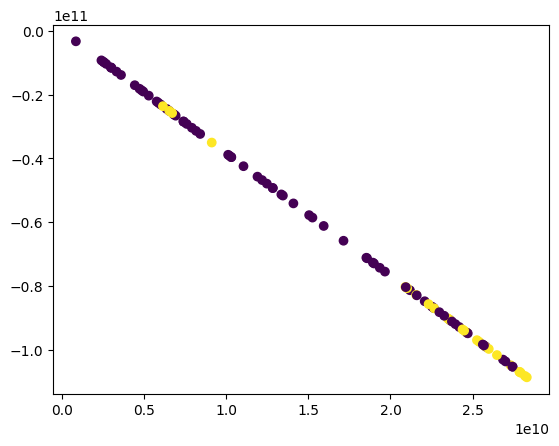

In [ ]:
plt.scatter(X_pcanew_c2.loc[:,0], X_pcanew_c2.loc[:,1], c=classification["Delay"][:100]);

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:551: ComplexWarning: Casting complex values to real discards the imaginary part
  (np.asanyarray(self.convert_xunits(offsets[:, 0]), float),
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:552: ComplexWarning: Casting complex values to real discards the imaginary part
  np.asanyarray(self.convert_yunits(offsets[:, 1]), float)))
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:389: ComplexWarning: Casting complex values to real discards the imaginary part
  c = tuple(map(float, c))


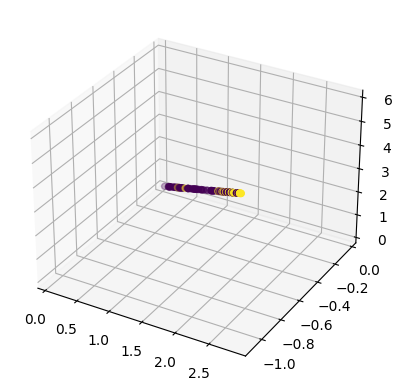

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pcanew_c3.loc[:,0], X_pcanew_c3.loc[:,1], X_pcanew_c3.loc[:,2], c=classification["Delay"][:100]);

In [ ]:
class LinLasso:
    def __init__(self):
        self.w = np.array([])
        self.y = np.array([])

    def fit(self, X, y, learning_rate = 0.0001, max_iter = 100, alpha = 1.):
        X = np.array(X)
        y = np.array(y)
        self.w = np.array([0 for i in range(X.shape[1])])
        self.w = np.append(self.w, 1)
        for t in range(max_iter):
            grad = np.array([])
            for i in range(X.shape[1]):
                grad = np.append(grad, (X[:, i]*(y - X.dot(self.w[:-1]) - self.w[-1])).sum() + alpha * self.w[i])
            grad = np.append(grad,(y - X.dot(self.w[:-1]) - self.w[-1]).sum() + alpha * self.w[-1])
            w_next = self.w - 2 * grad * learning_rate / len(X)
        self.w = w_next
        return self
    def predict(self, X):
        X = np.array(X)
        self.y = X.dot(self.w[:-1]) + self.w[-1]
        return self.y

l = LinLasso().fit(X_r_train[:1000], y_r_train[:1000])

In [ ]:
l.w

array([-9.99975738e-01, -4.88955241e+01, -4.57630738e+01, -5.37410943e+00,
       -5.37379546e+00, -3.31298186e+00, -2.31644000e-02, -6.54070000e-02,
       -2.93159000e-01, -2.12187200e-01, -1.99031800e-01, -9.09220000e-02,
       -9.35750000e-02, -1.21428200e-01, -1.71694800e-01, -1.31916200e-01,
       -1.22089200e-01, -6.13240000e-02, -1.27632000e-02, -2.30710000e-02,
       -2.24254200e-01, -1.54348400e-01, -1.17619600e-01, -1.68785000e-01,
       -3.55234000e-02, -5.65846000e-02,  2.07050400e-01])

In [ ]:
weights = enumerate(l.w)
weights = sorted(weights, key=lambda x: abs(x[1]), reverse=True)
weights

[(1, -48.895524120000005),
 (2, -45.76307384),
 (3, -5.374109434000001),
 (4, -5.373795456),
 (5, -3.312981858),
 (0, -0.999975738),
 (8, -0.293159),
 (20, -0.2242542),
 (9, -0.21218720000000002),
 (26, 0.20705039999999997),
 (10, -0.1990318),
 (14, -0.1716948),
 (23, -0.168785),
 (21, -0.1543484),
 (15, -0.1319162),
 (16, -0.12208920000000001),
 (13, -0.1214282),
 (22, -0.1176196),
 (12, -0.093575),
 (11, -0.09092200000000002),
 (7, -0.06540699999999999),
 (17, -0.061324000000000004),
 (25, -0.0565846),
 (24, -0.035523400000000004),
 (6, -0.0231644),
 (19, -0.023071),
 (18, -0.0127632)]